# Taller 1
## Diego Felipe Bryan \\ 201425625
### Teniendo en cuenta el código de referencia quiero:
#### 1. Hacer una función o programa que haga el cálculo de la ENFICC _según el enunciado las series entran con datos de 10 años en resolución horaria_.
#### 2. Función que devuelva la gráfica comparando la distribución de energía de diferentes series, <ins>según el enunciado las series entran con datos de 10 años en resolución horaria, pero la gráfica muestra promedios mensuales ordenados</ins>.
#### 3. Función para Medición-Correlación-Predicción que recibe IDEAM recortada, usa los datos de NREL y devuelve algo parecido a IDEAM completa.<ins>según el enunciado debe entrar una serie corta y la serie satelital</ins>.
#### 4. Funciones para calcular RMSEn, MBE, KSI% entre dos funciones y devuelve el error indicado. <ins>según el enunciado las series entran con datos de 10 años en resolución horaria, pero la gráfica muestra promedios mensuales ordenados pero en clase se compara punto a punto las series ordenadas que se graficaron en el punto 2</ins>.
#### 5. Análisis de eficacia para series de tiempo de <ins>diferentes localizaciones</ins>. Analizando como afecta <ins>la cantidad de datos y el año seleccionado</ins>.
#### 6. Es para el viernes 16 de Febrero de 2018 antes de las 5 pm.

## 1. Función ENFICC 99%

In [1]:
#Comandos operativos (se usa para unir las rutas)
import os 

#Se usa para manejar los datos -leer, crear, modificar, etc.
import pandas as pd 


#Importa numpy  y matplotlib
%pylab inline 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Populating the interactive namespace from numpy and matplotlib


In [2]:



#Para importar una imagen
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


In [3]:
#Dirección a la carpeta data -La carpeta debe estar creada-
base_dir = os.path.join( '.','data') 

#Dirección a la carpeta output -La carpeta debe estar creada-
output_dir = os.path.join( '.','output') 

#Nombre del lugar a evaluar
ciudad = 'Valledupar' 

#Origen de los datos, puede ser IDEAM o NREL
fuente = 'IDEAM'
fuenteSAT = 'NREL'

#Dirección completa de los datos a evaluar
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv') 
serie_csv_sat = os.path.join(base_dir,ciudad,fuenteSAT+'.csv')

# Usa panda para leer la serie de datos
# Toca saber cómo estan organizados los datos
serie_pd = pd.read_csv(serie_csv, sep = ';', encoding='latin-1') 
sat = pd.read_csv(serie_csv_sat, sep = ';',encoding='latin-1')

In [4]:
#Total de energía medida en un mes [kW]
def ghi_mensual(serie_horaria):
    #.unique me elimina los datos repetidos
    agnos = sorted(serie_horaria['AÑO'].unique())
    
    #Crea el dataframe para registrar los cálculos
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"]) 
    
    for agno in agnos:
        for mes in range(1,13):
            #Elije el nombre de la última columna sin tener que conocerlo
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno)&(serie_horaria['MES'] == mes)]["DIA"].unique())
            
            #.loc me localiza el mes exacto
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)& (serie_horaria["MES"] == mes)),nombre_energia].sum()/1000 
            
            #Formato con los valores estudiados que se van a agregar
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],"GHImes":ghi_mes}
            
            #.append agrega los datos que acabo de crear
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

#Promedio diario de energía que se crea en cada mes 
def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)&(serie_ghi_mensual["MES"] == mes)),"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)& (serie_ghi_mensual["MES"] == mes)),"GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [5]:
#Función que me describre el parametro de la ENFICC
def ENFICC (serie):
    mensual = ghi_mensual(serie)
    diario = ghi_dia(mensual)
    
        
    #Qué parte de la población voy a excluir para tener certeza del 99%
    percentil = 0.01
    
    #Qué valor me cumple con ese 99% de certeza 
    enficc = diario.quantile(q=percentil,numeric_only=True)["GHIdiario"]
    return print('La ENFICC 99% es:', enficc)


In [6]:
#PDO = Promedio Diario Ordenado para la realización de gráficas y comparación de errores
def PDO(serie):
    
    mensual = ghi_mensual(serie)
    diario = ghi_dia(mensual)
    
    #No me interesa en qué mes ocurre
    #Solo interesa la distribución de los datos
    datos = sorted(diario["GHIdiario"]) 
    return datos


In [7]:
#ENFICC prueba de las series de valledupar para los datos en tierra y satelite respectivamente
ENFICC(serie_pd)
ENFICC(sat)

La ENFICC 99% es: 4.56900737661
La ENFICC 99% es: 5.06265316667


## 2. Gráficas

In [8]:
#Función para graficar y comparar las series IDEAM, NREL y NREL corregidas
#Entran 3 series de 10 años en resolución horaria, la de mediciones en tierra, la satelital, y la satelital corrida. Además
#se debe incluir la localización y los peridos que se eligieron de referencia de IDEAM
def grafica3(objetivo,satelite,corregida,lugar,detalle):
    #Nombra los ejes
    pylab.xlabel("Datos")
    pylab.ylabel("Energía/Energía Base IDEAM") 
    
    #Devuelve la lista de promedios diarios ordenados que son los que se grafican en la figura 38 del protocolo
    objetivo = PDO(objetivo)
    satelite = PDO(satelite)
    corregida = PDO(corregida)
    
    #La energía base es el promedio mínimo producido en la mediciones en tierra (IDEAM)
    minimo = objetivo[0]
    
    #Valores x y y a graficar de cada serie a comparar
    x1 = list(range(len(objetivo)))
    y1 = objetivo/minimo
    pylab.plot(x1,y1,'-k', label='IDEAM')
    x2 = list(range(len(satelite)))
    y2 = satelite/minimo
    pylab.plot(x2,y2,'-b', label='NREL')
    x3 = list(range(len(corregida)))
    y3 = corregida/minimo
    pylab.plot(x3,y3,'--r', label='CORREGIDA')
    pylab.legend(loc='upper left')
    
    #Dirección para guardar la imagen
    pylab.savefig(os.path.join(output_dir,lugar+'_IDEAM'+detalle+'.png'), dpi=80)
    
    return pylab.show()
    

## 3. MCP

In [9]:
#Función para acortar una serie dentro de un año especifico y un rango de meses.
def restringir(serie,ano,mes1,mes2):
    serie = serie[(serie['AÑO'] == ano)&(serie['MES'] >= mes1)&(serie['MES'] <= mes2)]
    return serie

#Función para que la serie2 evalue los datos en la misma temporalidad de la serie1
def recortar(serie1,serie2):
    serie2 = serie2[(serie2['AÑO']>=serie1.iloc[0,0])&(serie2['AÑO']<=serie1.iloc[-1,0])
                 &(serie2['MES']>=serie1.iloc[0,1])&(serie2['MES']<=serie1.iloc[-1,1])]
    return serie2
    

In [10]:
#Para que no se modifiquen los datos previamente establecidos se hace un cambio de las variables
corta = restringir(serie_pd,2010,1,12)


In [11]:
#Medición-Correlación-Predicción recibe los datos medidos en tierra (cortos) y los datos satelitales.
def MCP(objetivo,larga):
    correct = larga.copy()
    
    #Recorta la serie satelital al periodo en común con los datos de tierro
    comun = recortar(objetivo,correct)
    
    #Cálculo de constantes en la función
    objetivo_barra = objetivo['IDEAM'].mean()
    comun_barra = comun['NREL'].mean()
    objetivo_sigma = objetivo['IDEAM'].std()
    comun_sigma = comun['NREL'].std()
    
    #Función aplicada a todos los datos medidos por el satelite
    ghi = (objetivo_barra - (objetivo_sigma/comun_sigma) * comun_barra) + (objetivo_sigma/comun_sigma)*correct['NREL']
    
    #Los datos que antes eran 0 se volvieron negativos entonces se corrigen con esto
    ghi[ghi <= 0] =  0
    
    #Reemplaza la columna de energía medida con los datos corregidos
    correct['NREL'] = ghi
    return correct

In [12]:
corregida = MCP(corta,sat)

In [13]:
#ENFICC prueba de las diferentes series de valledupar
ENFICC(serie_pd) #IDEAM (medidas en tierra)
ENFICC(sat)      #NREL (medidas satelitales)
ENFICC(corregida)#NRELcr (medidas satelitales corregidas)

La ENFICC 99% es: 4.56900737661
La ENFICC 99% es: 5.06265316667
La ENFICC 99% es: 4.4688224469


In [14]:
#Datos organizados de la serie IDEAM de valledupar
datos_IDEAM = PDO(serie_pd)

#Datos organizados de la serie NREL de valledupar
datos_NREL = PDO(sat)

#Datos organizados de la serie CORREGIDA NREL de valledupar 
datos_CORREGIDOS = PDO(corregida)

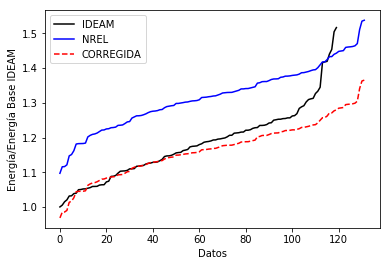

In [15]:
#Voy a usar el det para cambiar el nombre del archivo de imagen ('AÑO-MES1-MES2')
det = '(2010-1-12)'
grafica3(serie_pd,sat, corregida,ciudad,det)

## 4. Cálculos de error

In [16]:
#Donde la serie1 es la observada en tierra y la serie 2 es la modelada del satélite.
#Deben entrar dos series de datos de 10 años en resolución horaria.
def MBE (serie1,serie2): 
    #Hago que las listas queden del mismo tamaño 
    serie2 = recortar(serie1,serie2)
    
    #Cambio a los datos ordenados que quiero comparar
    serie1 = PDO(serie1)
    serie2 = PDO(serie2)
    
    #Cálculo de error MBE según protocolo
    suma1 = sum(serie1)
    suma2 = sum(serie2)
    error = suma2-suma1
    result = error / suma1
    
        
    
    return print('El MBE es:',"{:.2%}".format(result))
   

In [17]:
MBE(serie_pd,sat)
MBE(serie_pd,corregida)


El MBE es: 11.51%
El MBE es: -1.25%


In [18]:
#Donde la serie1 es la observada en tierra y la serie 2 es la modelada del satélite
##Deben entrar dos series de datos de 10 años en resolución horaria.
def RMSE (serie1,serie2): 
    #Hago que las listas queden del mismo tamaño 
    serie2 = recortar(serie1,serie2)
    
    #Cambio a los datos ordenados que quiero comparar
    serie1 = PDO(serie1)
    serie2 = PDO(serie2)
    
    #Cálculo de error RMSE según protocolo
    error = 0
    sumatoria = 0
    for i in range(0,len(serie1)):
        ghi_obs = serie1[i]
        ghi_mod = serie2[i]
        resta = (ghi_obs - ghi_mod)**2
        error = error + resta
        sumatoria = sumatoria + ghi_obs
        
    error = sqrt(error/len(serie1))
    result = error / (serie1[-1]-serie1[0])  
    
    return print('El RMSE es:',"{:.2%}".format(result))
   


In [19]:
RMSE(serie_pd,sat)
RMSE(serie_pd,corregida)


El RMSE es: 26.95%
El RMSE es: 7.29%


In [20]:
#Importa la libreria para comparar las series
from scipy import stats

In [21]:
# Usar .stats.ks_2samp como KSI con datos equivalentes
#Deben entrar dos series de datos de 10 años en resolución horaria.
def KSI (serie1, serie2):
    #Hago que las listas queden del mismo tamaño 
    serie2 = recortar(serie1,serie2)
    
    #Cambio a los datos ordenados que quiero comparar
    serie1 = PDO(serie1)
    serie2 = PDO(serie2)
    
    #Cálculo de error KSI según lo acordado en clase
    error = stats.ks_2samp(serie1, serie2)
    return print('El pvalue es:',"{:.2%}".format(error[-1]))

    

In [22]:
KSI(serie_pd,sat)
KSI(serie_pd,corregida)

El pvalue es: 0.00%
El pvalue es: 45.97%


## Análisis

Para el análisis de los datos se pensó usar primero los datos de Santa Marta, pero los datos medidos en tierra (IDEAM) no cumplían la condición de tener diez años en muestras. De los datos disponibles, los **únicos** que cumplen con esta característica son: Medellín, Sucre, Uribia y Valledupar. Por lo tanto se hace un análisis inicial comparando la diferencia entre los resultados del método de corrección **dependiendo la localización** para todos los lugares que cumplen con la condición y en el primer año de medición que fue el año 2006.

###### Tabla 1. Resumen de errores comparados para diferentes lugares cuyos datos han sido corregidos.
Lugar      | Año  | Meses  | MBE   |  RMSE  |  PVALUE  |
-----------|------|--------|-------|--------|----------|
Medellín   | 2006 |  1-12  | 0.93% |  5.37% | 45.97%   |
Sucre      | 2006 |  1-12  | 6.77% | 13.38% |  0.59%   |
Uribia     | 2006 |  1-12  | 2.68% |  4.99% |  1.39%   |
Valledupar | 2006 |  1-12  | 3.36% |  9.92% |  0.23%   |

Una vez realizada la corrección para cada localización se encontró la serie que mejor se ajusta a los datos medidos en tierra es Medellín, luego le sigue Uribia, luego Valledupar y por último sucre. Esto puede ser debido a la variabilidad  de los datos en cada lugar. Esta variabilidad se puede apreciar en las siguientes gráficas que muestran el promedio de energía diaria medida, dependiendo de cada mes. En un intento de normalizar la gráfica todos los datos fueron dividos en la energía mínima medidaen tierra. De estos, los lugares que presentaron menor variabilidad fueron Valledupar, luego Medellín, Uribia y el que tuvo la mayor variabilidad fue Sucre.



##### Figura 1. Promedio diario medido en tierra (IDEAM), en satelite (NREL) y corregido. 1) Medellín 2)Sucre 3)Uribia 4) Valledupar
1) 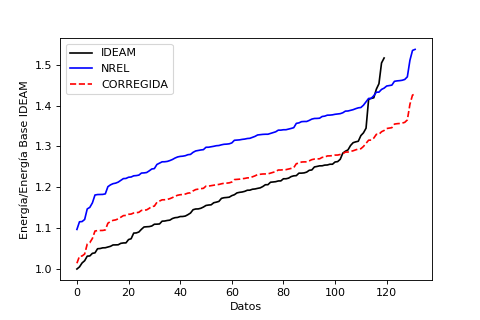
2) 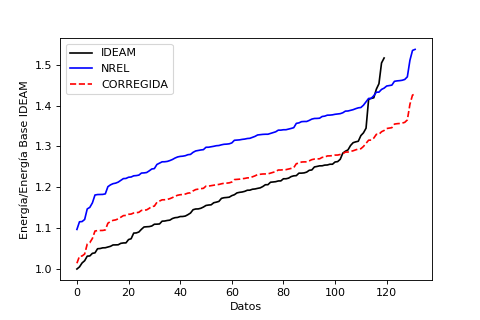
3) 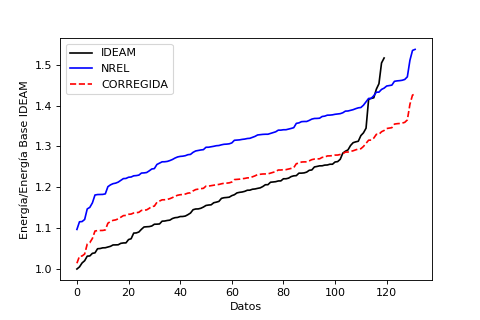
4) 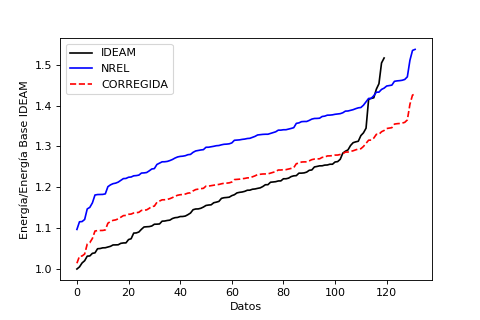

Lugar    | Año  | Meses | MBE | RMSE | PVALUE| Corregido 
---------|------|-------|-----|------|-------|----------
Medellin | 2010 | 3-12  | 11% | 5%   | 0.5   | NO  

## Anexos

Para el análisis de diferentes lugares:

In [23]:
ciudad1 = 'Medellin' 
ciudad2 = 'Sucre' 
ciudad3 = 'Uribia' 
ciudad4 = 'Valledupar' 


fuente = 'IDEAM'
fuenteSAT = 'NREL'

serie_csv1 = os.path.join(base_dir,ciudad1,fuente+'.csv') 
serie_csv2 = os.path.join(base_dir,ciudad2,fuente+'.csv') 
serie_csv3 = os.path.join(base_dir,ciudad3,fuente+'.csv') 
serie_csv4 = os.path.join(base_dir,ciudad4,fuente+'.csv') 

serie_csv_sat1 = os.path.join(base_dir,ciudad1,fuenteSAT+'.csv')
serie_csv_sat2 = os.path.join(base_dir,ciudad2,fuenteSAT+'.csv')
serie_csv_sat3 = os.path.join(base_dir,ciudad3,fuenteSAT+'.csv')
serie_csv_sat4 = os.path.join(base_dir,ciudad4,fuenteSAT+'.csv')


terra1 = pd.read_csv(serie_csv1, sep = ';', encoding='latin-1') 
terra2 = pd.read_csv(serie_csv2, sep = ';', encoding='latin-1') 
terra3 = pd.read_csv(serie_csv3, sep = ';', encoding='latin-1') 
terra4 = pd.read_csv(serie_csv4, sep = ';', encoding='latin-1') 

sat1 = pd.read_csv(serie_csv_sat1, sep = ';',encoding='latin-1')
sat2 = pd.read_csv(serie_csv_sat2, sep = ';',encoding='latin-1')
sat3 = pd.read_csv(serie_csv_sat3, sep = ';',encoding='latin-1')
sat4 = pd.read_csv(serie_csv_sat4, sep = ';',encoding='latin-1')


Para el análisis de lugar se elige un año completo y se mantiene constante

In [24]:
corta1 = restringir(terra1,2006,1,12)
corta2 = restringir(terra2,2006,1,12)
corta3 = restringir(terra3,2006,1,12)
corta4 = restringir(terra4,2006,1,12)

Se hace la corrección (MCP) para cada lugar

In [25]:
corregida1 = MCP(corta1,sat1)
corregida2 = MCP(corta2,sat2)
corregida3 = MCP(corta3,sat3)
corregida4 = MCP(corta4,sat4)

Primer factor a comparar en resultado de la ENFICC para cada lugar:

In [26]:

print('Medellin')
ENFICC(terra1)
ENFICC(sat1)
ENFICC(corregida1)

print('Sucre')
ENFICC(terra2)
ENFICC(sat2)
ENFICC(corregida2)

print('Uribia')
ENFICC(terra3)
ENFICC(sat3)
ENFICC(corregida3)

print('Valledupar')
ENFICC(terra4)
ENFICC(sat4)
ENFICC(corregida4)

Medellin
La ENFICC 99% es: 3.53519358791
La ENFICC 99% es: 4.32600282796
La ENFICC 99% es: 3.62781224044
Sucre
La ENFICC 99% es: 2.37964439946
La ENFICC 99% es: 4.8399985
La ENFICC 99% es: 4.39233206155
Uribia
La ENFICC 99% es: 4.2818970848
La ENFICC 99% es: 4.62250183333
La ENFICC 99% es: 4.37527775642
Valledupar
La ENFICC 99% es: 4.56900737661
La ENFICC 99% es: 5.06265316667
La ENFICC 99% es: 4.67999615779


Se hacen las gráficas de cada lugar

In [27]:
det = '_2006_1_12'

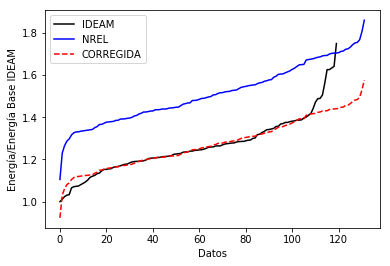

In [28]:
grafica3(terra1,sat1,corregida1,ciudad1,det)

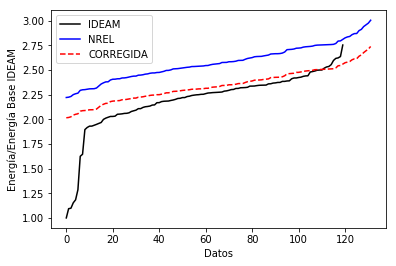

In [29]:
grafica3(terra2,sat2,corregida2,ciudad2,det)

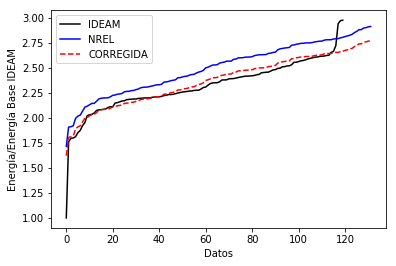

In [30]:
grafica3(terra3,sat3,corregida3,ciudad3,det)

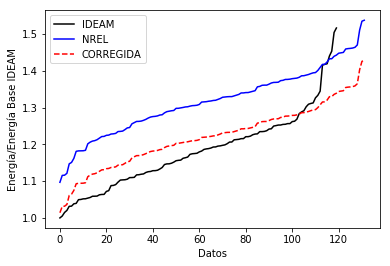

In [31]:
grafica3(terra4,sat4,corregida4,ciudad4,det)

Cálculo de errores para cada lugar

In [32]:
print('Medellin')
MBE(terra1,corregida1)
RMSE(terra1,corregida1)
KSI(terra1,corregida1)

print('Sucre')
MBE(terra2,corregida2)
RMSE(terra2,corregida2)
KSI(terra2,corregida2)

print('Urubia')
MBE(terra3,corregida3)
RMSE(terra3,corregida3)
KSI(terra3,corregida3)

print('Valledupar')
MBE(terra4,corregida4)
RMSE(terra4,corregida4)
KSI(terra4,corregida4)

Medellin
El MBE es: 0.93%
El RMSE es: 5.37%
El pvalue es: 45.97%
Sucre
El MBE es: 6.77%
El RMSE es: 13.38%
El pvalue es: 0.59%
Urubia
El MBE es: 2.68%
El RMSE es: 4.99%
El pvalue es: 1.39%
Valledupar
El MBE es: 3.36%
El RMSE es: 9.92%
El pvalue es: 0.23%
